In [21]:
%matplotlib inline

import pandas as pd
import seaborn as sns

In [14]:
df = pd.read_csv('./../8V280L8VQ-clash-royale-da.csv', sep=',')

In [31]:
df = df.sort_index(axis=1 ,ascending=True)

In [59]:
def arena(trophies):
    if trophies < 400:
        return '1'
    elif trophies < 800:
        return '2'
    elif trophies < 1100:
        return '3'
    elif trophies < 1400:
        return '4'
    elif trophies < 1700:
        return '5'
    elif trophies < 2000:
        return '6'
    elif trophies < 2300:
        return '7'
    elif trophies < 2600:
        return '8'
    elif trophies < 3000:
        return '9'
    elif trophies < 3400:
        return '10'
    elif trophies < 3800:
        return '11'
    else: 
        return '12'

In [65]:
df['arena'] = df['my_trophies'].apply(lambda row: arena(row))

In [66]:
pd.set_option('display.max_columns', None)  
df.describe()

,my_Archers,my_Arrows,my_Baby_Dragon,my_Balloon,my_Bomber,my_Cannon,my_Fire_Spirits,my_Fireball,my_Furnace,my_Giant,my_Goblin_Barrel,my_Goblins,my_Hog_Rider,my_Inferno_Tower,my_Knight,my_Mega_Knight,my_Mini_P.E.K.K.A,my_Minions,my_Mortar,my_Musketeer,my_Prince,my_Rage,my_Skeleton_Army,my_Spear_Goblins,my_Valkyrie,my_Witch,my_Zap,my_buildings,my_commons,my_deck_elixir,my_epics,my_legendaries,my_rares,my_score,my_spells,my_troops,my_trophies,op_Archers,op_Arrows,op_Baby_Dragon,op_Balloon,op_Bandit,op_Barbarian_Hut,op_Barbarians,op_Battle_Ram,op_Bomb_Tower,op_Bomber,op_Cannon,op_Dark_Prince,op_Electro_Wizard,op_Elite_Barbarians,op_Elixir_Collector,op_Fire_Spirits,op_Fireball,op_Freeze,op_Furnace,op_Giant,op_Giant_Skeleton,op_Goblin_Barrel,op_Goblin_Hut,op_Goblins,op_Golem,op_Graveyard,op_Hog_Rider,op_Ice_Wizard,op_Inferno_Dragon,op_Inferno_Tower,op_Knight,op_Lava_Hound,op_Lightning,op_Lumberjack,op_Mega_Knight,op_Miner,op_Mini_P.E.K.K.A,op_Minion_Horde,op_Minions,op_Mirror,op_Mortar,op_Musketeer,op_P.E.K.K.A,op_Poison,op_Prince,op_Rage,op_Rocket,op_Royal_Giant,op_Skeleton_Army,op_Skeleton_Barrel,op_Skeletons,op_Sparky,op_Spear_Goblins,op_Tesla,op_The_Log,op_Three_Musketeers,op_Tombstone,op_Tornado,op_Valkyrie,op_Witch,op_Wizard,op_X-Bow,op_Zap,op_buildings,op_commons,op_deck_elixir,op_epics,op_legendaries,op_rares,op_spells,op_troops,opponent_score,opponent_trophies,points
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.00000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,0.333333,3.463768,1.338164,0.859903,0.487923,1.439614,0.188406,3.292271,0.502415,0.280193,0.978261,0.545894,0.512077,0.253623,0.340580,0.050725,0.741546,5.294686,1.579710,0.454106,0.021739,0.014493,0.768116,3.106280,0.009662,0.490338,2.248792,0.681159,3.362319,3.483696,2.714976,0.050725,1.871981,1.437198,2.606280,4.712560,1461.777778,0.845411,2.019324,1.050725,0.553140,0.004831,0.118357,0.297101,0.045894,0.048309,0.884058,0.070048,0.007246,0.007246,0.082126,0.062802,0.340580,0.908213,0.028986,0.065217,0.664251,0.268116,0.487923,0.516908,0.352657,0.031401,0.021739,0.666667,0.028986,0.033816,0.149758,1.120773,0.026570,0.096618,0.002415,0.002415,0.019324,1.016908,2.084541,0.582126,0.251208,0.041063,1.103865,0.248792,0.041063,0.944444,0.306763,0.405797,0.043478,1.258454,0.120773,0.115942,0.007246,1.222222,0.135266,0.016908,0.012077,0.108696,0.084541,1.603865,0.963768,1.212560,0.091787,0.649758,0.391304,1.971014,3.993357,3.478261,0.157005,2.39372,1.606280,6.002415,1.463768,1461.509662,4.934783
std,1.158190,2.621829,0.693549,0.971600,1.341677,3.054782,1.047659,1.079901,1.163923,0.816740,0.916362,1.590398,1.099680,1.098502,1.350256,0.219700,1.487108,2.568221,2.636524,1.111930,0.189330,0.208262,0.973920,2.646814,0.097937,0.742128,3.156673,0.733021,0.783690,0.214924,0.910481,0.219700,0.823703,0.974079,0.489165,0.704181,494.604999,2.013337,2.886826,1.124173,1.0254

## Difference of trophies between me and my opponents

In [33]:
df_diff_troph = df[['my_trophies', 'opponent_trophies']]

df_diff_troph = df_diff_troph.assign(troph_diff = df.my_trophies - df.opponent_trophies)

In [34]:
df_diff_troph['troph_diff'].describe()

count    414.000000
mean       0.268116
std       50.009569
min      -86.000000
25%      -49.000000
50%       19.000000
75%       46.750000
max       87.000000
Name: troph_diff, dtype: float64

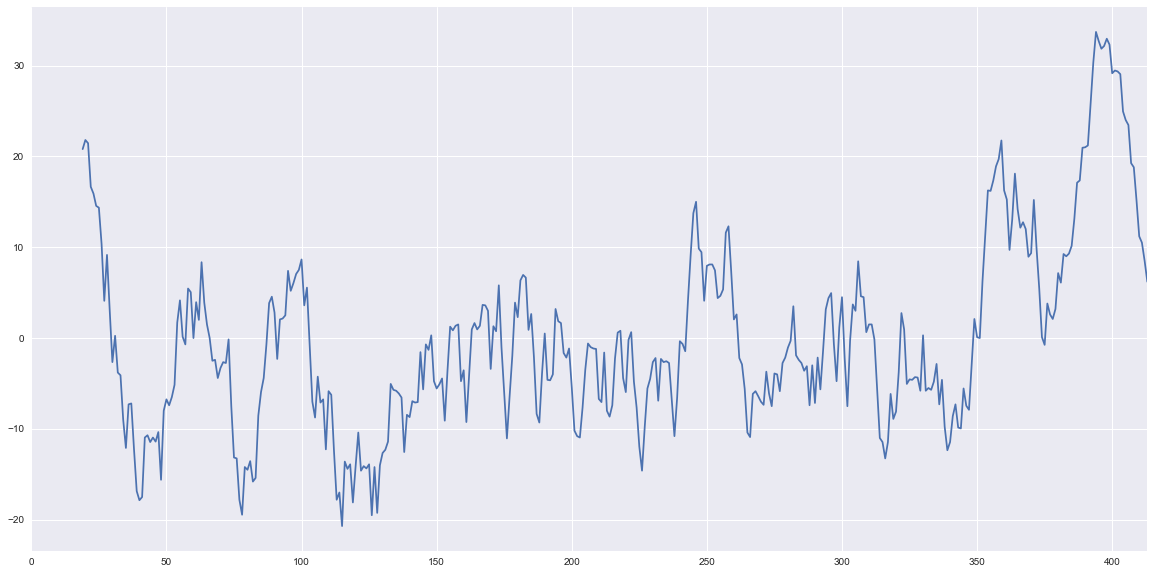

In [52]:
(df_diff_troph['troph_diff'].rolling(window = 20)
     .mean()
     .plot(figsize=(20, 10)))

### Number of battles I had more trophies than my opponent

In [45]:
df_diff_troph[df_diff_troph.troph_diff > 0]['troph_diff'].describe()

count    213.000000
mean      46.140845
std       15.582673
min        6.000000
25%       35.000000
50%       46.000000
75%       54.000000
max       87.000000
Name: troph_diff, dtype: float64

### Number of battles I had more trophies than my opponent

In [46]:
df_diff_troph[df_diff_troph.troph_diff < 0]['troph_diff'].describe()

count    199.000000
mean     -48.829146
std       16.438159
min      -86.000000
25%      -58.000000
50%      -50.000000
75%      -40.500000
max       -4.000000
Name: troph_diff, dtype: float64

### Number of battles me and the opponent had the same trophies

In [47]:
df_diff_troph[df_diff_troph.troph_diff == 0]['troph_diff'].describe()

count    2.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: troph_diff, dtype: float64

## Opponents' elixir

In [48]:
df['op_deck_elixir'].describe()

count    414.000000
mean       3.993357
std        0.460978
min        2.125000
25%        3.750000
50%        4.000000
75%        4.250000
max        5.375000
Name: op_deck_elixir, dtype: float64

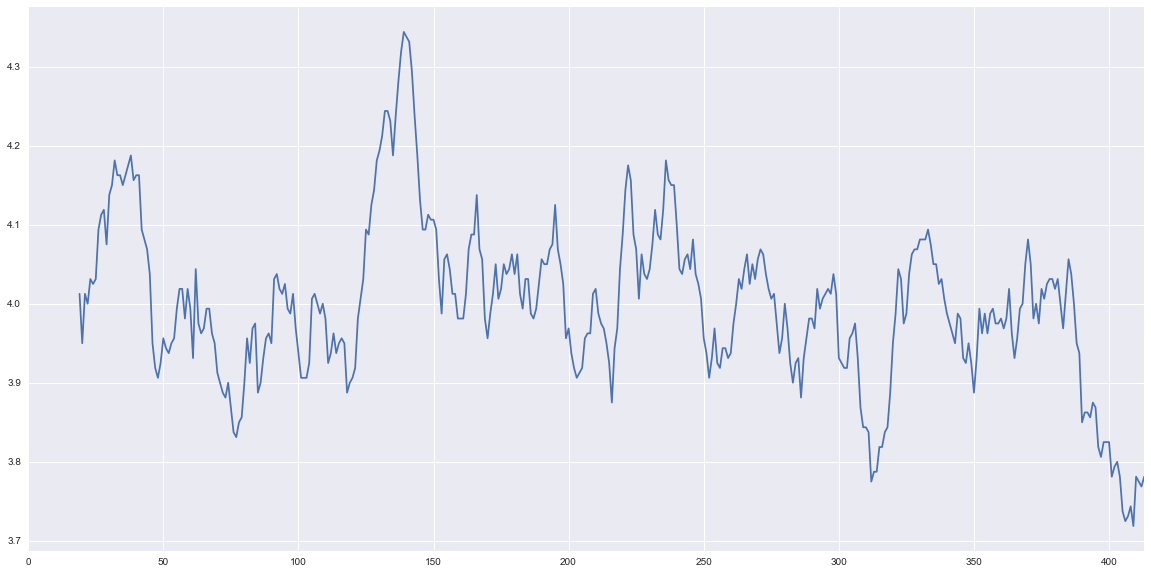

In [51]:
(df['op_deck_elixir'].rolling(window = 20)
     .mean()
     .plot(figsize=(20, 10)))

In [ ]:
# Elixir de oponentes en función de mi resultado

### Median deck elixir cost by arena

In [70]:
df[['op_deck_elixir', 'arena']].groupby(['arena']).median()

,op_deck_elixir
arena,
1,3.6875
2,4.0000
3,4.0000
4,3.8750
5,4.0000
6,4.0000
7,4.0000


## Opponents' elixir based on my battle result

In [71]:
df[df.my_result == 'Victory']['op_deck_elixir'].describe()

count    205.000000
mean     3.961585  
std      0.493496  
min      2.125000  
25%      3.625000  
50%      4.000000  
75%      4.250000  
max      5.375000  
Name: op_deck_elixir, dtype: float64

In [72]:
df[df.my_result == 'Defeat']['op_deck_elixir'].describe()

count    192.000000
mean     4.036458  
std      0.424008  
min      3.125000  
25%      3.750000  
50%      4.000000  
75%      4.375000  
max      5.250000  
Name: op_deck_elixir, dtype: float64

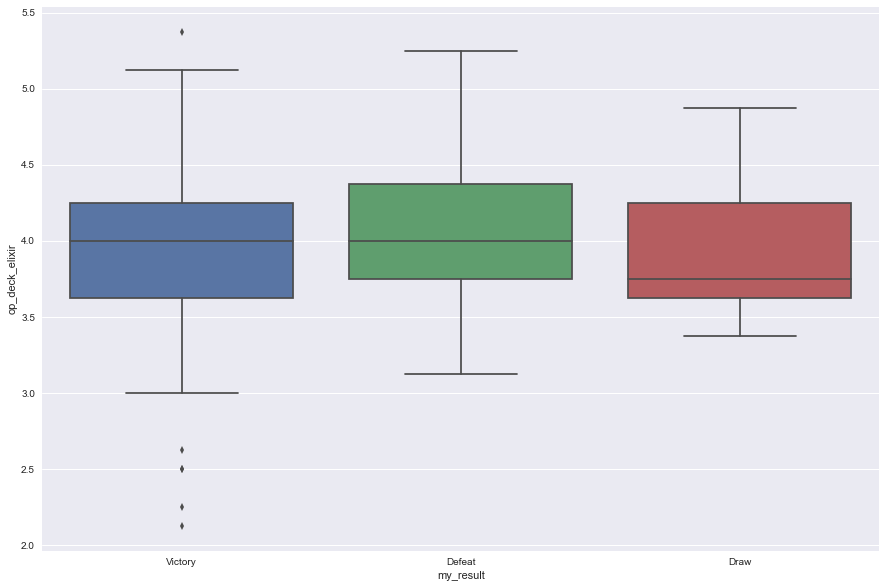

In [73]:
sns.plt.figure(figsize=(15, 10))
sns.boxplot(x=df['my_result'], y=df['op_deck_elixir'])
sns.plt.show()